In [ ]:
#   로지스틱 회귀분석   -   logistic, sigmoid (0.0 ~ 1.0)
#   의사결정나무    -   규칙기반(과적합이 잘 됨 -> 가지치기로 중단해야함)
#   랜덤포레스트    -    
#   사례기반추론    -   
#   SVM     -   support vector machin
#   인공신경망  -   

# 대학평가(정형분류 실습)

In [1]:
#대학평가(kaggle에서 수집한 데이터를 가공하여 실습)
import pandas as pd

df = pd.read_csv("c:/workspace3/data/data.csv")

df.head()

,teaching,international,research,citations,income,num_students,student_staff_ratio,international_students,total_score,Label
0,12.4,95.6,10.6,13.3,33.3,5226,14.1,0.82,59.8,0
1,29.9,90.1,20.1,65.3,33.9,2473,15.6,0.63,59.8,0
2,24.7,82.6,18.9,43.5,28.4,2473,15.6,0.63,59.8,0
3,61.3,98.6,67.5,94.6,65.4,9666,10.5,0.54,76.1,1
4,62.4,98.8,57.0,95.0,49.8,9666,10.5,0.54,73.0,1


In [2]:
train_cols = df.columns[0:8]

print(train_cols)

X = df[train_cols] # 독립변수
y = df["Label"] # 종속변수

Index(['teaching', 'international', 'research', 'citations', 'income',
       'num_students', 'student_staff_ratio', 'international_students'],
      dtype='object')


In [3]:
df["Label"].value_counts()

Label
0    2158
1     445
Name: count, dtype: int64

Text(0.5, 1.0, '분류\n (0: bad, 1: good)')

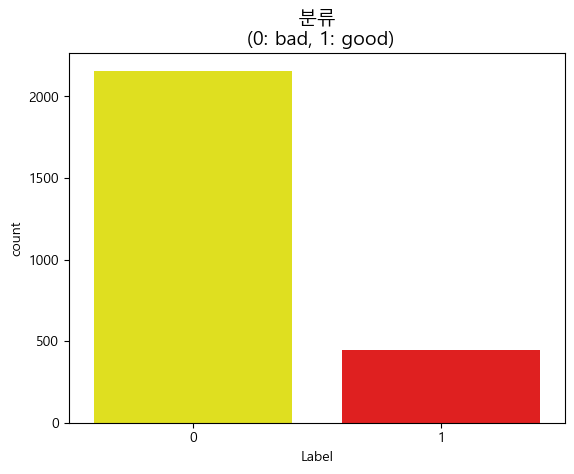

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

import seaborn as sns

colors = ["yellow", "red"]

sns.countplot(x='Label', data=df, palette=colors)
plt.title('분류\n (0: bad, 1: good)', fontsize=14)

#불균형 데이터셋

In [5]:
#언더샘플링

from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)

X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Label'])

df_samp=pd.concat([X_samp,y_samp],axis=1)
df_samp["Label"].value_counts()

Label
0    445
1    445
Name: count, dtype: int64

In [6]:
X=df_samp[train_cols]
y=df_samp["Label"]

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,random_state=10)

### 로지스틱 회귀분석

In [8]:
#로지스틱 회귀분석
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(random_state=10,max_iter=1000)
#                                           최대반복횟수
logit.fit(X_train, y_train)

print("학습용:",logit.score(X_train, y_train))
print("검증용:",logit.score(X_test, y_test))

학습용: 0.8890449438202247
검증용: 0.8539325842696629


In [ ]:
# logit.predict(X_test)

# logit.predict_proba(X_test)
# #   확률

In [9]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()
scaler.fit(X_train)
#   학습용 분석

X_train_scaled = pd.DataFrame(scaler.transform(X_train))
#   학습용 변환
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
#   검증용 변환

In [10]:
#다양한 알고리즘별 정확도를 저장할 리스트
result_tr=[]
result_te=[]

In [11]:
logit = LogisticRegression(random_state=10)
logit.fit(X_train_scaled, y_train)

score_tr=logit.score(X_train_scaled, y_train)
score_te=logit.score(X_test_scaled, y_test)

print("학습용:",score_tr)
print("검증용:",score_te)

result_tr.append(score_tr)
result_te.append(score_te)

학습용: 0.9887640449438202
검증용: 0.9943820224719101


### 의사결정나무

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=10)
#       의사결정나무    -   규칙기반
tree.fit(X_train_scaled, y_train)

print("학습용:",tree.score(X_train_scaled, y_train))
print("검증용:",tree.score(X_test_scaled, y_test))

학습용: 1.0
검증용: 0.9719101123595506


In [13]:
# max_depth 가지치기

tree = DecisionTreeClassifier(max_depth=4, random_state=10)
tree.fit(X_train_scaled, y_train)

score_tr=tree.score(X_train_scaled, y_train)
score_te=tree.score(X_test_scaled, y_test)

print("학습용:",score_tr)
print("검증용:",score_te)

학습용: 0.9789325842696629
검증용: 0.9775280898876404


In [14]:
result_tr.append(score_tr)
result_te.append(score_te)

In [15]:
# ! pip install pydotplus

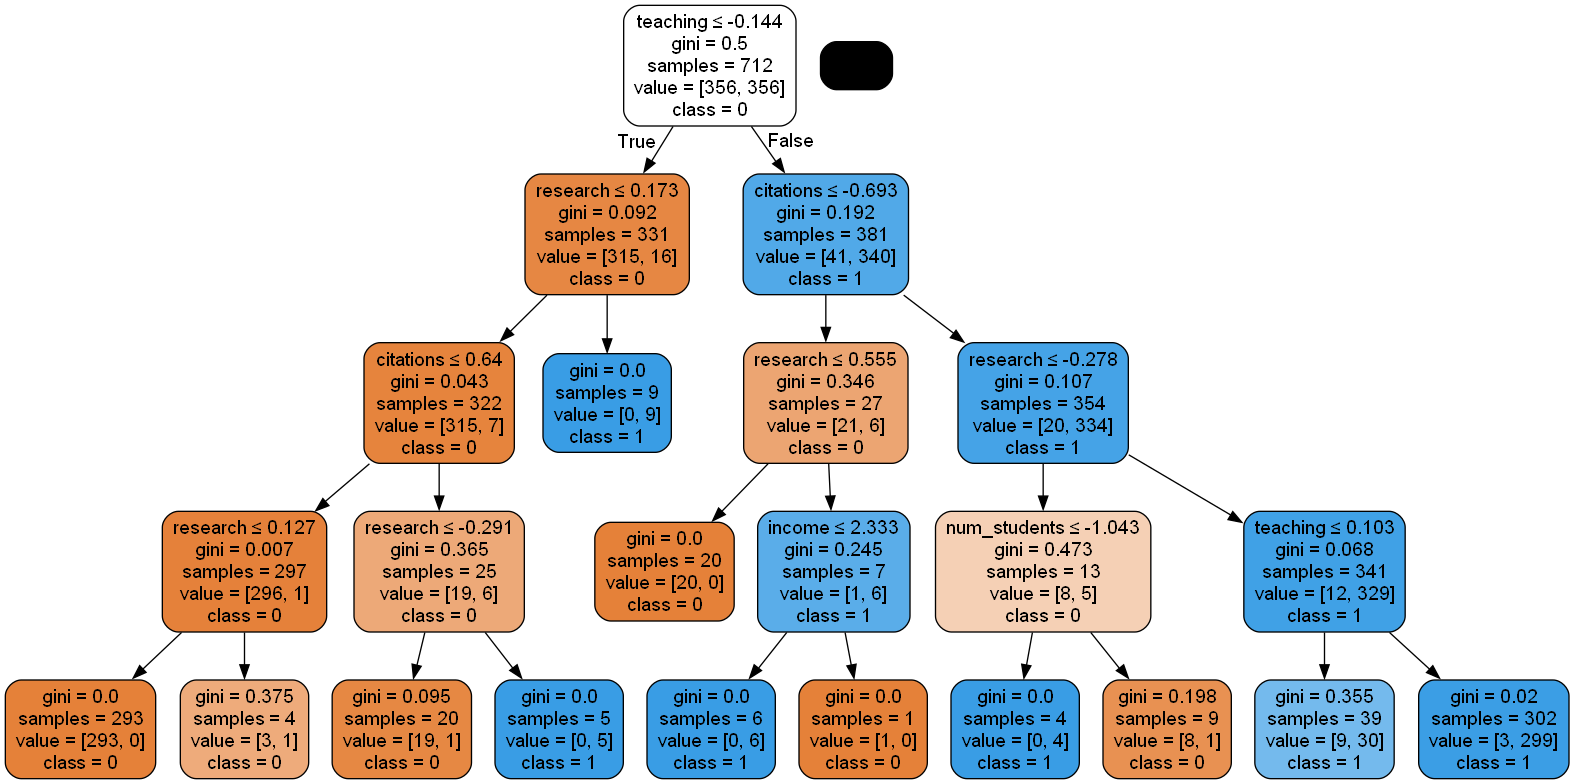

In [16]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(tree, out_file=None, feature_names=train_cols, class_names=["0","1"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
#   entropy     혼잡도
#               0(정리가 된 상태)       1(정리가 안된 상태)

#   gini
#               0                       0.5

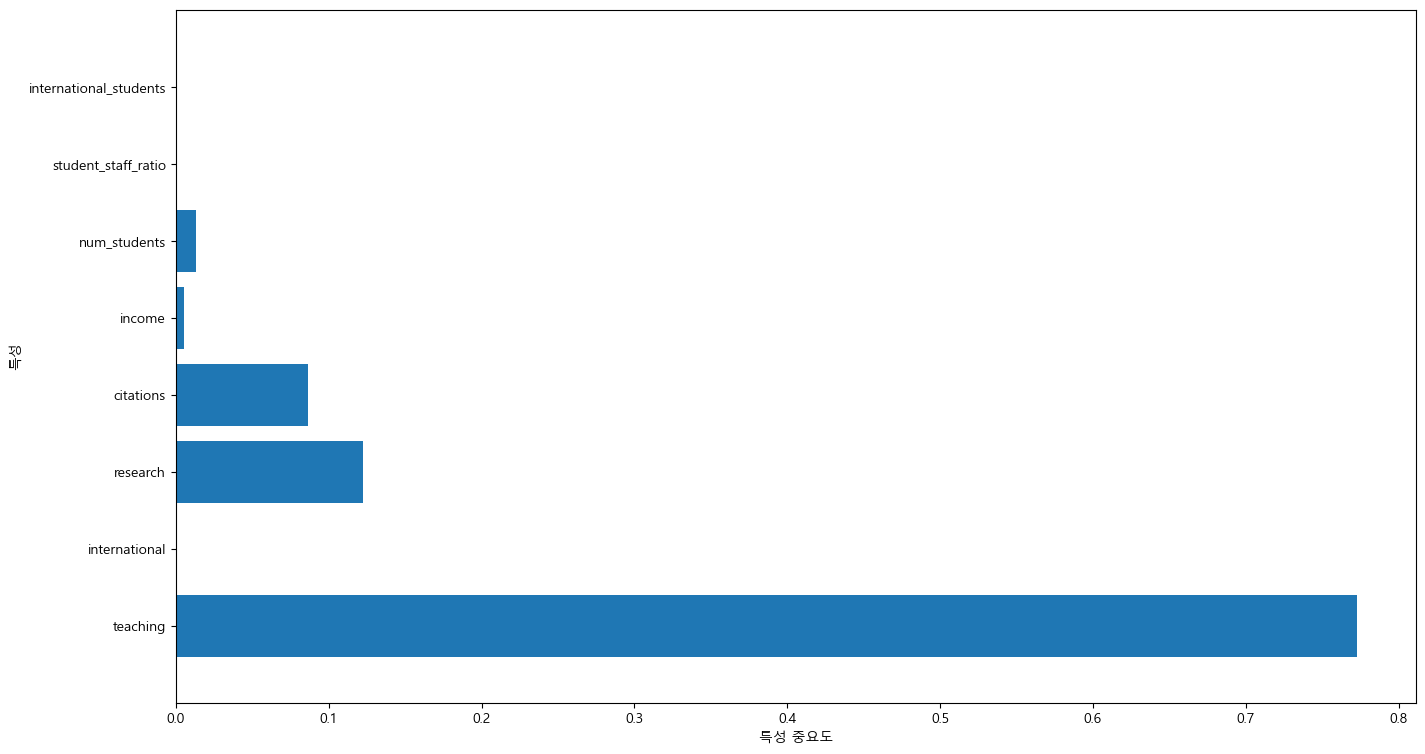

In [17]:
#트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가하는 특성 중요도 적용
#0~1 사이의 값(0 전혀 사용되지 않음 ~ 1 완벽하게 타겟 클래스 예측)
import numpy as np

def plot_tree(model):
    n_features = X.shape[1]
    #           변수의 개수
    plt.rcParams["figure.figsize"]=(16,9)
    #                               그래프 사이즈
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_cols)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)
plot_tree(tree)

#특성 중요도 :

### 랜덤포레스트

In [ ]:
#   앙상블 학습
#   대중의 지혜

In [18]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier

#100개의 트리로 구성된 랜덤 포레스트
forest = RandomForestClassifier(n_estimators=100, random_state=10)
#                                   모형의 개수
forest.fit(X_train_scaled, y_train)

score_tr=forest.score(X_train_scaled, y_train)
score_te=forest.score(X_test_scaled, y_test)

print("학습용:",score_tr)
print("검증용:",score_te)

학습용: 1.0
검증용: 0.9943820224719101


In [19]:
result_tr.append(score_tr)
result_te.append(score_te)

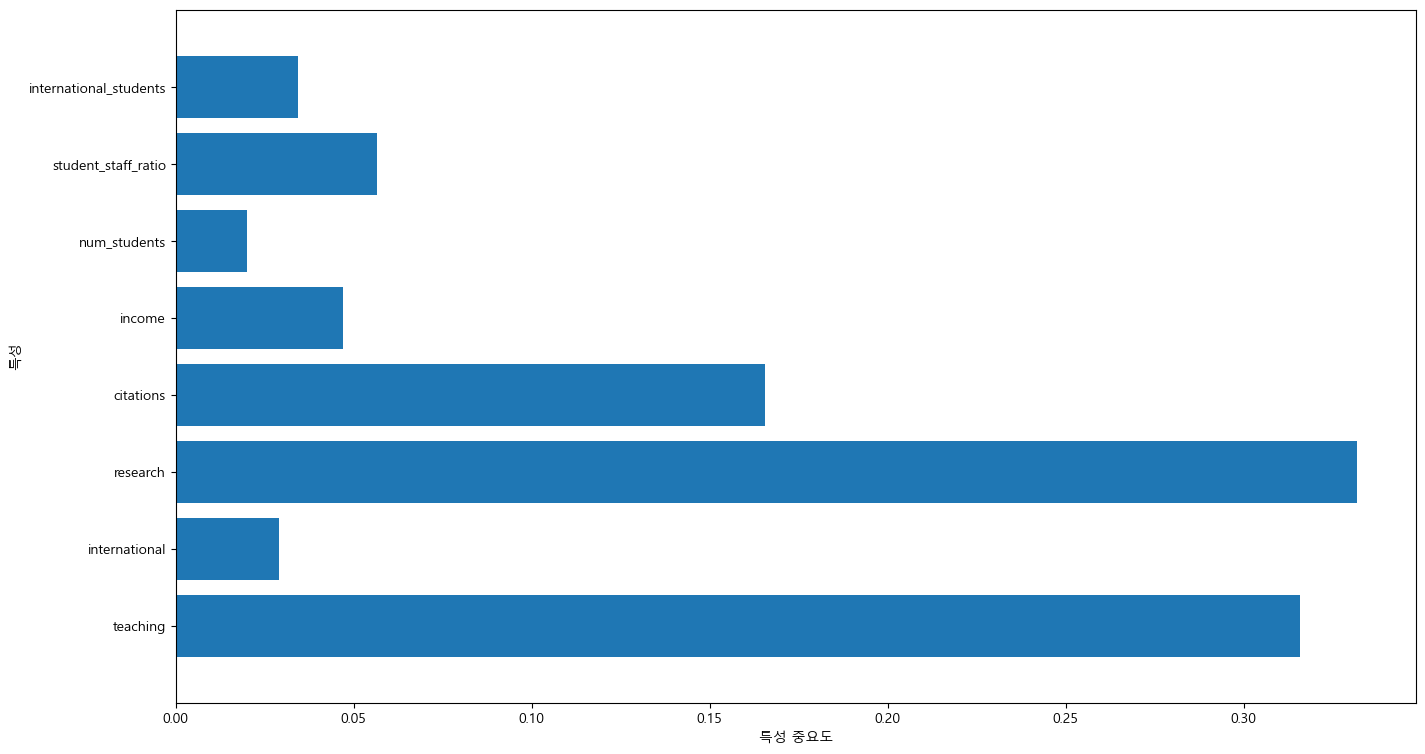

In [20]:
#랜덤 포레스트에서 제공하는 각 트리의 특성 중요도
#랜덤 포레스트는 좀 더 폭넓은 시각으로 데이터를 관찰할 수 있다

plot_tree(forest)

#특성 중요도 :

### KNN(사례기반 추론)

In [ ]:
#   데이터를 분류할 때 가장 유사한 데이터를 찾음
#   사례기반 추론
#   x                   이웃수(k) : 2
#     *
#       x

#   유클리드 거리 - 직선 거리
#   맨해튼 거리 - 직각으로 거리 

#   단점 : 데이터가 잘 구축이 되지 않았을 경우, 개성이 뚜렷한 데이터는 잘 찾아내지 못함

In [21]:
#knn
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_rate = []
test_rate = []

# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다.
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1 에서 10 까지 n_neighbors 를 적용

neighbors = range(1, 11)

for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
#                               이웃의 수
    knn.fit(X_train_scaled, y_train)

    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train_scaled, y_train))

    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test_scaled, y_test))

test_arr=np.array(test_rate) #검증용 데이터셋의 정확도
max_rate=np.max(test_arr) #가장 좋은 정확도
idx=np.where(test_arr == max_rate)[0][0] #가장 성능이 좋은 인덱스

print("최적의 k:",neighbors[idx])
print("최고 정확도:",test_rate[idx])

최적의 k: 5
최고 정확도: 0.9887640449438202


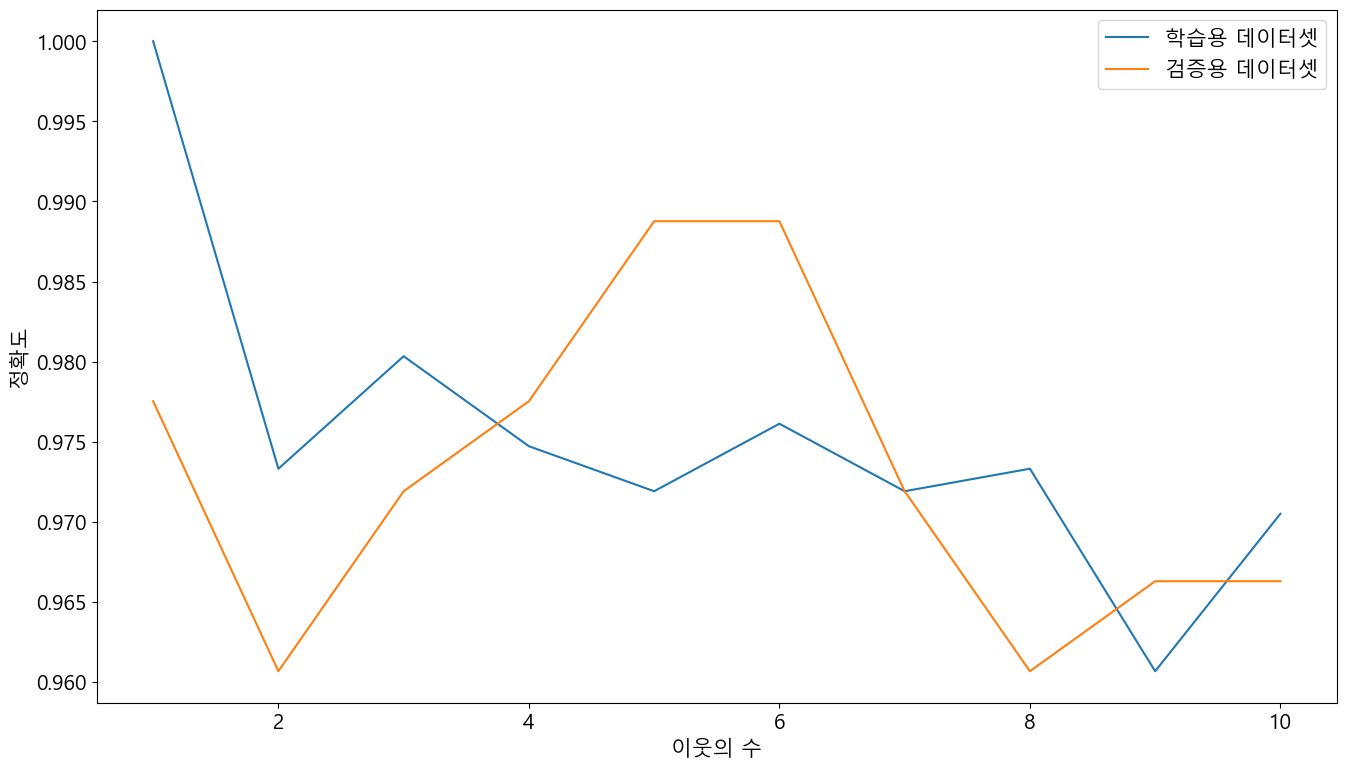

In [22]:
plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="학습용 데이터셋")
plt.plot(neighbors, test_rate, label="검증용 데이터셋")

plt.ylabel("정확도")
plt.xlabel("이웃의 수")

plt.legend()
#학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측
#이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.

In [23]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

score_tr=knn.score(X_train_scaled, y_train)
score_te=knn.score(X_test_scaled, y_test)

print("학습용:",score_tr)
print("검증용:",score_te)

학습용: 0.9803370786516854
검증용: 0.9719101123595506


In [24]:
result_tr.append(score_tr)
result_te.append(score_te)

### 인공신경망

In [25]:
#인공신경망
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=10)
mlp.fit(X_train_scaled, y_train)

print("학습용:",mlp.score(X_train_scaled, y_train))
print("검증용:",mlp.score(X_test_scaled, y_test))

학습용: 0.9943820224719101
검증용: 0.9943820224719101


c:\Python3.9.13\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [26]:
score_tr=mlp.score(X_train_scaled, y_train)
score_te=mlp.score(X_test_scaled, y_test)

print("학습용:",score_tr)
print("검증용:",score_te)

학습용: 0.9943820224719101
검증용: 0.9943820224719101


In [27]:
result_tr.append(score_tr)

result_te.append(score_te)

### SVM(Support Vector Machine)

In [ ]:

#                       o
#       o
#                               x
#               x


#   C       - 오차에 대한 패널티
#   gamma   - 개별 샘플의 영향력

In [28]:
#svm
from sklearn.svm import SVC

svm = SVC(random_state=10)
svm.fit(X_train_scaled, y_train)

print("학습용:",svm.score(X_train_scaled, y_train))
print("검증용:",svm.score(X_test_scaled, y_test))

학습용: 0.9873595505617978
검증용: 0.9887640449438202


In [29]:
#최적의 C value와 gamma value를 찾는 과정
import numpy as np

train_rate = []
test_rate = []

c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
g_values = [0.0001, 0.001, 0.01, 0.1]

for n in c_values:
    for g in g_values:
        # 모델 생성
        svm = SVC(C=n,gamma=g,random_state=10)
        svm.fit(X_train_scaled, y_train)

        # 학습용 데이터셋의 정확도
        train_rate.append([n,g,svm.score(X_train_scaled, y_train)])

        # 검증용 데이터셋의 정확도
        test_rate.append([n,g,svm.score(X_test_scaled, y_test)])

train_arr=np.array(train_rate) #검증용 데이터셋의 정확도
test_arr=np.array(test_rate) #검증용 데이터셋의 정확도

max_rate=np.max(test_arr[:,2]) #가장 좋은 정확도

idx=np.argmax(test_arr[:,2]) #가장 성능이 좋은 인덱스

print("최적의 c:",test_rate[idx][0])
print("최적의 gamma:",test_rate[idx][1])
print("최고 정확도:",test_rate[idx][2])  

최적의 c: 100
최적의 gamma: 0.01
최고 정확도: 1.0


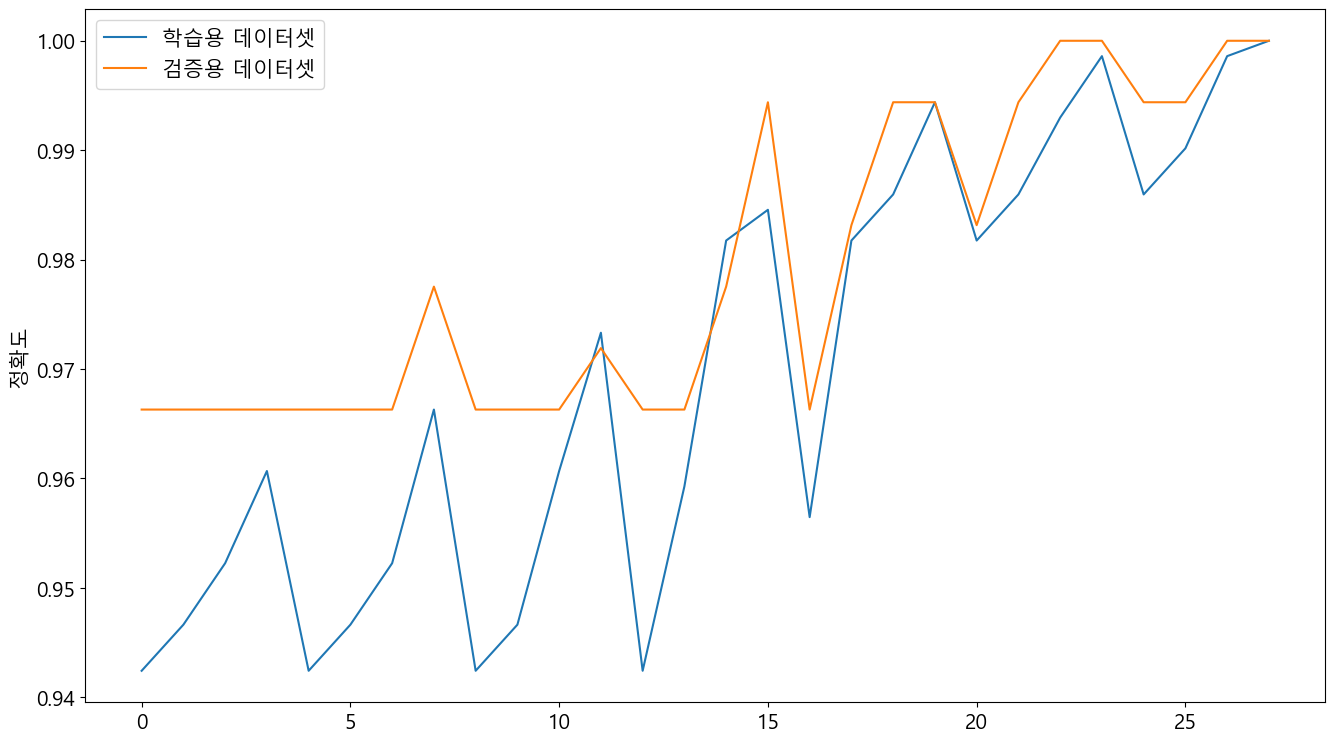

In [30]:
plt.rcParams["font.size"]=15

plt.plot(range(len(train_rate)), train_arr[:,2], label="학습용 데이터셋")
plt.plot(range(len(test_rate)), test_arr[:,2], label="검증용 데이터셋")

plt.ylabel("정확도")

plt.legend()

In [31]:
from sklearn.svm import SVC

svm = SVC(C=1,gamma=0.0001,random_state=10)

svm.fit(X_train_scaled, y_train)

score_tr=svm.score(X_train_scaled, y_train)
score_te=svm.score(X_test_scaled, y_test)

print("학습용:",score_tr)
print("검증용:",score_te)

학습용: 0.9424157303370787
검증용: 0.9662921348314607


In [32]:
result_tr.append(score_tr)
result_te.append(score_te)

# 신경망

In [33]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

model = Sequential()

model.add(Dense(64,input_shape=(X.shape[1],),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

sgd = SGD(learning_rate=0.01)
#       확률적 경사 하강법

model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


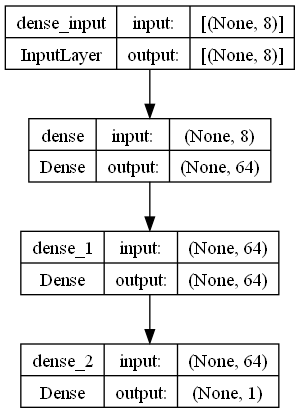

In [35]:
from keras.utils import plot_model  

plot_model(model,show_shapes=True)

In [36]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger

es = EarlyStopping(monitor='val_loss', patience=5)

# 학습 과정에서 만들어진 최적의 파라미터 조합으로 모형을 저장
mc = ModelCheckpoint("./model/school_best.h5", save_best_only=True)

# 학습이 잘 안될 때 학습률을 동적으로 조절하는 옵션
rlr = ReduceLROnPlateau(factor=0.1, patience=5) 

#기존 학습률*factor (배수)
# 학습 과정의 주요 history를 csv로 저장

csvlogger = CSVLogger("./model/mylog.csv")  

hist = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=500, callbacks=[es, mc, rlr, csvlogger])

Epoch 1/500


18/18 [==============================] - 1s 15ms/step - loss: 0.6602 - accuracy: 0.7100 - val_loss: 0.6238 - val_accuracy: 0.8322 - lr: 0.0100
Epoch 2/500
18/18 [==============================] - 0s 7ms/step - loss: 0.6147 - accuracy: 0.8348 - val_loss: 0.5787 - val_accuracy: 0.9091 - lr: 0.0100
Epoch 3/500
18/18 [==============================] - 0s 7ms/step - loss: 0.5739 - accuracy: 0.8946 - val_loss: 0.5379 - val_accuracy: 0.9091 - lr: 0.0100
Epoch 4/500
18/18 [==============================] - 0s 8ms/step - loss: 0.5359 - accuracy: 0.9332 - val_loss: 0.5003 - val_accuracy: 0.9301 - lr: 0.0100
Epoch 5/500
18/18 [==============================] - 0s 6ms/step - loss: 0.5004 - accuracy: 0.9525 - val_loss: 0.4653 - val_accuracy: 0.9580 - lr: 0.0100
Epoch 6/500
18/18 [==============================] - 0s 6ms/step - loss: 0.4671 - accuracy: 0.9561 - val_loss: 0.4329 - val_accuracy: 0.9580 - lr: 0.0100
Epoch 7/500
18/18 [==============================] - 0s 6ms/step - loss: 0.4358 - accur

In [37]:
from keras.models import load_model  

model=load_model('./model/school_best.h5')

model.evaluate(X_test_scaled, y_test, verbose=0)

[0.012635978870093822, 1.0]

In [38]:
loss, acc_tr = model.evaluate(X_train_scaled, y_train,  verbose=0)
loss, acc_te = model.evaluate(X_test_scaled, y_test,  verbose=0)

print(acc_tr)
print(acc_te)

result_tr.append(acc_tr)
result_te.append(acc_te)

0.9971910119056702
1.0


['LOGIT', 'Tree', 'RF', 'KNN', 'ANN', 'SVM', 'DNN']
[0.9887640449438202, 0.9789325842696629, 1.0, 0.9803370786516854, 0.9943820224719101, 0.9424157303370787, 0.9971910119056702]
[0.9943820224719101, 0.9775280898876404, 0.9943820224719101, 0.9719101123595506, 0.9943820224719101, 0.9662921348314607, 1.0]
최적의 모형(학습용): RF
최고 정확도(학습용): 1.0
최적의 모형(검증용): DNN
최고 정확도(검증용): 1.0


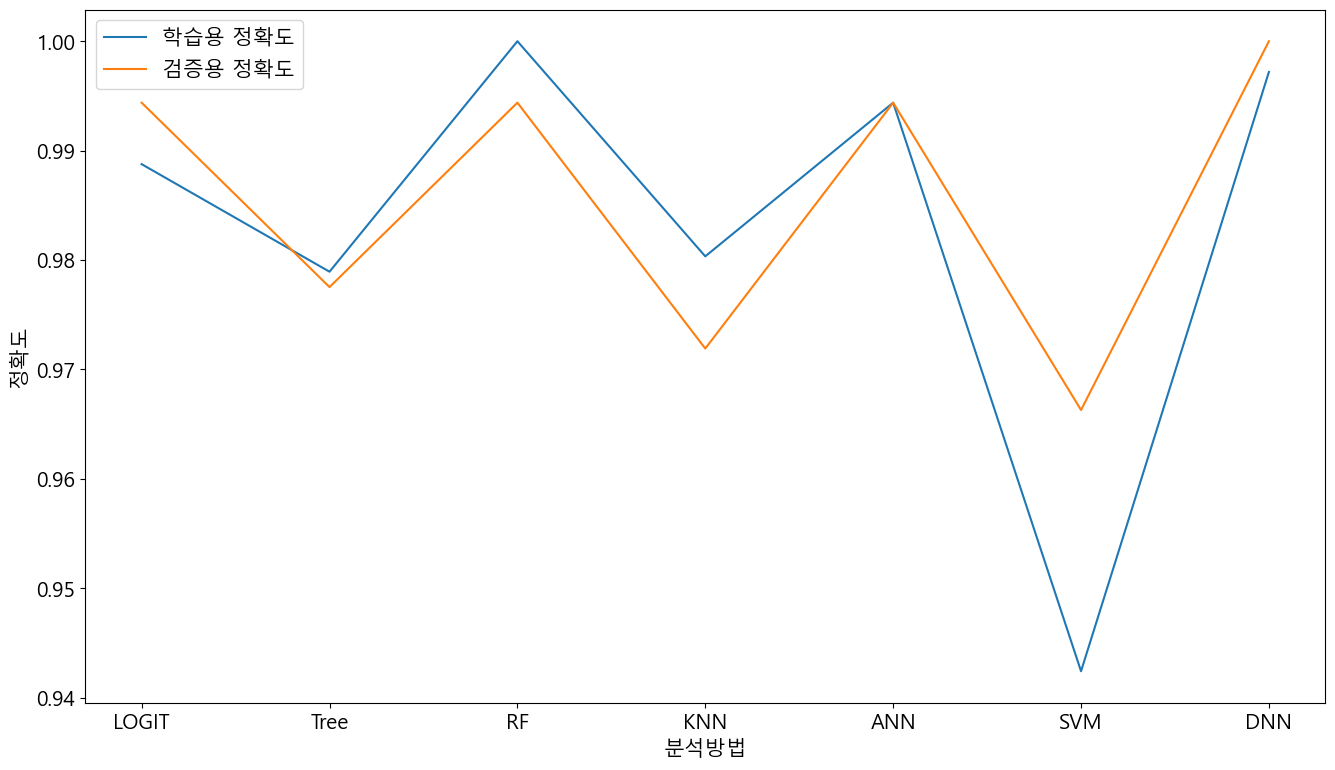

In [39]:
#알고리즘별 예측도 그래프
methods=["LOGIT","Tree","RF","KNN","ANN","SVM","DNN"]

result_tr_arr=np.array(result_tr) #검증용 데이터셋의 정확도
max_rate_tr=np.max(result_tr_arr) #가장 좋은 정확도
idx_tr=np.argmax(result_tr_arr) #가장 성능이 좋은 인덱스
result_te_arr=np.array(result_te) #검증용 데이터셋의 정확도
max_rate_te=np.max(result_te_arr) #가장 좋은 정확도
idx_te=np.argmax(result_te_arr) #가장 성능이 좋은 인덱스

print(methods)
print(result_tr)
print(result_te)

print("최적의 모형(학습용):",methods[idx_tr])
print("최고 정확도(학습용):",max_rate_tr)        
print("최적의 모형(검증용):",methods[idx_te])
print("최고 정확도(검증용):",max_rate_te)        


plt.rcParams["font.size"]=15

plt.plot(methods, result_tr_arr, label="학습용 정확도")
plt.plot(methods, result_te_arr, label="검증용 정확도")

plt.xlabel("분석방법")
plt.ylabel("정확도")

plt.legend()
plt.show()